In [70]:
#GENERAL
import pandas as pd
from pandas import HDFStore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob

In [71]:
#Surface_Data = Path("../input/surface-crack-detection")
Surface_Data = Path("/home/jumbo/notebooks/Walls")
hdf = HDFStore('wallhdf.h5')

In [72]:
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))
Surface_JPG_Path[:5]

[PosixPath('/home/jumbo/notebooks/Walls/Non-cracked/7135-209.jpg'),
 PosixPath('/home/jumbo/notebooks/Walls/Non-cracked/7072-224.jpg'),
 PosixPath('/home/jumbo/notebooks/Walls/Non-cracked/7107-245.jpg'),
 PosixPath('/home/jumbo/notebooks/Walls/Non-cracked/7139-215.jpg'),
 PosixPath('/home/jumbo/notebooks/Walls/Non-cracked/7079-80.jpg')]

In [73]:
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))
Surface_Labels[:5]

['Non-cracked', 'Non-cracked', 'Non-cracked', 'Non-cracked', 'Non-cracked']

In [74]:
dict={'image_path':Surface_JPG_Path, 'labels':Surface_Labels}
data = pd.DataFrame(dict)
data.columns

Index(['image_path', 'labels'], dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(dict)
data_le['labels'] = labelencoder.fit_transform(data_le['labels'])
data_le

,image_path,labels
0,/home/jumbo/notebooks/Walls/Non-cracked/7135-2...,1
1,/home/jumbo/notebooks/Walls/Non-cracked/7072-2...,1
2,/home/jumbo/notebooks/Walls/Non-cracked/7107-2...,1
3,/home/jumbo/notebooks/Walls/Non-cracked/7139-2...,1
4,/home/jumbo/notebooks/Walls/Non-cracked/7079-8...,1
...,...,...
18133,/home/jumbo/notebooks/Walls/Cracked/7085-112.jpg,0
18134,/home/jumbo/notebooks/Walls/Cracked/7119-241.jpg,0
18135,/home/jumbo/notebooks/Walls/Cracked/7119-245.jpg,0
18136,/home/jumbo/notebooks/Walls/Cracked/7083-241.jpg,0


In [76]:
from PIL import Image
import pandas as pd

# Assuming your DataFrame is named df with columns 'image_path' and 'class'
# Example DataFrame:
# df = pd.DataFrame({'image_path': ['path/to/image1.jpg', 'path/to/image2.jpg'],
#                    'class': ['class1', 'class2']})

# Function to load and resize an image
def load_and_resize_image(image_path, target_size=(256, 256)):
    try:
        img = Image.open(image_path)
        img = img.resize(target_size)
        return img
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Set the batch size
batch_size = 1000  # You can adjust this value based on your system's capacity
df = data_le.copy()
# Process images in batches
for i in range(0, len(df), batch_size):
    batch_df = df.iloc[i:i + batch_size].copy()

    # Apply the function to each row in the batch
    batch_df['resized_image'] = batch_df['image_path'].apply(load_and_resize_image)

    # Remove rows with errors (images that couldn't be loaded)
    batch_df = batch_df.dropna()

    # Optionally, you can convert the 'resized_image' column to a list of arrays
    batch_df['resized_image'] = batch_df['resized_image'].apply(lambda x: np.array(x))

    # Update the original DataFrame with the processed batch
    df.loc[batch_df.index, 'resized_image'] = batch_df['resized_image']

# Display the modified DataFrame
print(df)


                                              image_path  labels  \
0      /home/jumbo/notebooks/Walls/Non-cracked/7135-2...       1   
1      /home/jumbo/notebooks/Walls/Non-cracked/7072-2...       1   
2      /home/jumbo/notebooks/Walls/Non-cracked/7107-2...       1   
3      /home/jumbo/notebooks/Walls/Non-cracked/7139-2...       1   
4      /home/jumbo/notebooks/Walls/Non-cracked/7079-8...       1   
...                                                  ...     ...   
18133   /home/jumbo/notebooks/Walls/Cracked/7085-112.jpg       0   
18134   /home/jumbo/notebooks/Walls/Cracked/7119-241.jpg       0   
18135   /home/jumbo/notebooks/Walls/Cracked/7119-245.jpg       0   
18136   /home/jumbo/notebooks/Walls/Cracked/7083-241.jpg       0   
18137    /home/jumbo/notebooks/Walls/Cracked/7090-13.jpg       0   

                                           resized_image  
0      [[[153, 166, 175], [150, 163, 172], [147, 160,...  
1      [[[159, 160, 162], [158, 159, 161], [158, 159,...  
2     

In [77]:
df.columns

Index(['image_path', 'labels', 'resized_image'], dtype='object')

In [78]:
df['resized_image'][0].shape

(256, 256, 3)

In [79]:
len(df['resized_image'])

18138

In [80]:
df2=pd.DataFrame()

In [81]:
def flatten_extend(matrix):
     flat_list = []
     for row in matrix:
        flat_list.extend(row)
     return flat_list

In [82]:
lis1 = np.array(df['resized_image'][0])
lis1    

array([[[153, 166, 175],
        [150, 163, 172],
        [147, 160, 169],
        ...,
        [151, 165, 174],
        [153, 167, 176],
        [154, 168, 177]],

       [[152, 165, 174],
        [149, 162, 171],
        [145, 158, 167],
        ...,
        [153, 167, 176],
        [154, 168, 177],
        [155, 169, 178]],

       [[151, 164, 173],
        [147, 160, 169],
        [142, 155, 164],
        ...,
        [157, 171, 180],
        [157, 171, 180],
        [156, 170, 179]],

       ...,

       [[147, 157, 166],
        [137, 147, 156],
        [146, 156, 165],
        ...,
        [163, 176, 184],
        [157, 170, 178],
        [159, 172, 180]],

       [[134, 144, 153],
        [120, 130, 139],
        [130, 140, 149],
        ...,
        [151, 164, 172],
        [143, 156, 164],
        [141, 154, 162]],

       [[117, 127, 136],
        [101, 111, 120],
        [112, 122, 131],
        ...,
        [137, 150, 158],
        [128, 141, 149],
        [123, 136, 144]]

In [83]:
lis2 = lis1.flatten()
lis2

array([153, 166, 175, ..., 123, 136, 144], dtype=uint8)

In [84]:
lis2.shape

(196608,)

In [85]:
len(df2)

0

In [86]:
if(len(df2)==0):
    df2=lis2
else:
  df2=np.stack([df2, lis2])

In [87]:
df2

array([153, 166, 175, ..., 123, 136, 144], dtype=uint8)

In [88]:
print(len(df2))

196608


In [89]:
for ind in df.index:
    lis1 = np.array(df['resized_image'][ind])
    lis2 = lis1.flatten()

In [90]:
from PIL import Image
from IPython.display import display
import cv2

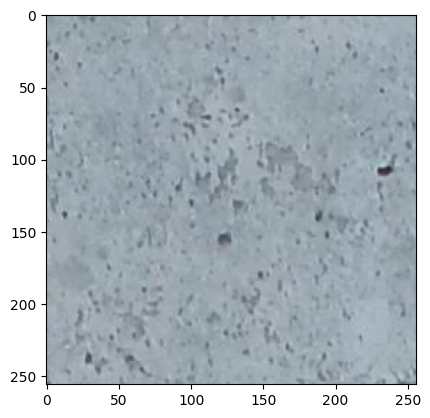

In [91]:
plt.imshow(df['resized_image'][0])

In [92]:
print(type(df['resized_image'][0]))

<class 'numpy.ndarray'>


In [93]:
display(df['resized_image'][0])

array([[[153, 166, 175],
        [150, 163, 172],
        [147, 160, 169],
        ...,
        [151, 165, 174],
        [153, 167, 176],
        [154, 168, 177]],

       [[152, 165, 174],
        [149, 162, 171],
        [145, 158, 167],
        ...,
        [153, 167, 176],
        [154, 168, 177],
        [155, 169, 178]],

       [[151, 164, 173],
        [147, 160, 169],
        [142, 155, 164],
        ...,
        [157, 171, 180],
        [157, 171, 180],
        [156, 170, 179]],

       ...,

       [[147, 157, 166],
        [137, 147, 156],
        [146, 156, 165],
        ...,
        [163, 176, 184],
        [157, 170, 178],
        [159, 172, 180]],

       [[134, 144, 153],
        [120, 130, 139],
        [130, 140, 149],
        ...,
        [151, 164, 172],
        [143, 156, 164],
        [141, 154, 162]],

       [[117, 127, 136],
        [101, 111, 120],
        [112, 122, 131],
        ...,
        [137, 150, 158],
        [128, 141, 149],
        [123, 136, 144]]

In [94]:
# result_array = existing_array + [new_list]
ndf=[]
for ind in df.index:
    lis1 = np.array(df['resized_image'][ind])
    lis2 = lis1.flatten()
    #print(df2.shape,lis2.shape)
    if len(ndf)==0:
        ndf=[lis2]
    else:
        ndf=ndf + [lis2]
        #df2.loc[len(df2)] = lis2 

In [95]:
print(ndf)

[array([153, 166, 175, ..., 123, 136, 144], dtype=uint8), array([159, 160, 162, ..., 172, 173, 175], dtype=uint8), array([140, 153, 161, ..., 141, 149, 152], dtype=uint8), array([166, 179, 188, ..., 155, 168, 176], dtype=uint8), array([174, 185, 191, ..., 174, 184, 193], dtype=uint8), array([152, 165, 173, ..., 158, 173, 180], dtype=uint8), array([165, 172, 180, ..., 172, 183, 189], dtype=uint8), array([173, 172, 170, ..., 166, 165, 161], dtype=uint8), array([145, 155, 165, ..., 161, 171, 183], dtype=uint8), array([167, 174, 182, ..., 165, 172, 180], dtype=uint8), array([139, 139, 139, ..., 162, 161, 159], dtype=uint8), array([161, 174, 183, ..., 141, 153, 165], dtype=uint8), array([179, 186, 194, ..., 176, 186, 195], dtype=uint8), array([174, 185, 191, ..., 167, 178, 184], dtype=uint8), array([178, 191, 199, ..., 179, 190, 196], dtype=uint8), array([166, 166, 166, ..., 160, 162, 161], dtype=uint8), array([182, 182, 182, ..., 159, 161, 158], dtype=uint8), array([171, 185, 196, ..., 165

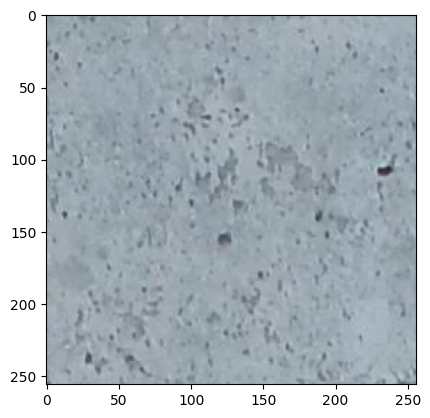

In [96]:
plt.imshow(ndf[0].reshape(256,256,3))

In [97]:
len(ndf)

18138

In [98]:
ndf[0]

array([153, 166, 175, ..., 123, 136, 144], dtype=uint8)

In [99]:
print(len(ndf))

18138


In [100]:
print(len(df['labels']))

18138


In [101]:
print(df['labels'])

0        1
1        1
2        1
3        1
4        1
        ..
18133    0
18134    0
18135    0
18136    0
18137    0
Name: labels, Length: 18138, dtype: int64


In [102]:
df['images'] = ndf

In [103]:
df.columns

Index(['image_path', 'labels', 'resized_image', 'images'], dtype='object')

In [104]:
print(type(ndf))
print(len(ndf))

<class 'list'>
18138


In [105]:
dict={'images':ndf, 'labels':df['labels']}
data = pd.DataFrame(dict)
data.columns

Index(['images', 'labels'], dtype='object')

In [106]:
print(data['images'].head())
print(data['labels'].head())

0    [153, 166, 175, 150, 163, 172, 147, 160, 169, ...
1    [159, 160, 162, 158, 159, 161, 158, 159, 161, ...
2    [140, 153, 161, 140, 153, 161, 140, 153, 161, ...
3    [166, 179, 188, 166, 179, 188, 166, 179, 188, ...
4    [174, 185, 191, 175, 186, 192, 176, 187, 193, ...
Name: images, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: labels, dtype: int64


In [107]:
from sklearn.model_selection import train_test_split

In [109]:
xTrain,xTest,yTrain,yTest = train_test_split(data['images'],data['labels'],train_size=0.7,shuffle=True,random_state=42)

In [110]:
print(len(xTrain),len(yTrain))

12696 12696


In [111]:
xTrain.shape

(12696,)

In [112]:
print(type(xTrain))

<class 'pandas.core.series.Series'>


In [118]:
len(xTrain)

12696

In [122]:
xTrain.keys

<bound method Series.keys of 5916     [177, 185, 188, 178, 186, 189, 178, 186, 189, ...
5172     [163, 173, 182, 161, 171, 180, 159, 169, 178, ...
1934     [165, 173, 176, 170, 178, 181, 166, 174, 177, ...
16999    [168, 178, 187, 170, 180, 189, 171, 181, 190, ...
4694     [149, 159, 168, 153, 163, 172, 157, 167, 176, ...
                               ...                        
11284    [165, 173, 176, 168, 176, 179, 173, 181, 184, ...
11964    [174, 181, 189, 173, 180, 188, 175, 182, 190, ...
5390     [173, 173, 171, 175, 175, 173, 177, 177, 175, ...
860      [163, 163, 163, 161, 161, 161, 159, 159, 159, ...
15795    [165, 167, 166, 158, 160, 159, 157, 159, 158, ...
Name: images, Length: 12696, dtype: object>

In [123]:
xTrain.values

array([array([177, 185, 188, ..., 178, 186, 189], dtype=uint8),
       array([163, 173, 182, ..., 160, 167, 175], dtype=uint8),
       array([165, 173, 176, ..., 142, 147, 150], dtype=uint8), ...,
       array([173, 173, 171, ..., 175, 175, 175], dtype=uint8),
       array([163, 163, 163, ..., 161, 161, 161], dtype=uint8),
       array([165, 167, 166, ..., 168, 179, 183], dtype=uint8)],
      dtype=object)

In [130]:
len(xTrain)

12696

In [137]:
print(type(xTrain))

<class 'pandas.core.series.Series'>


In [138]:
li1=xTrain.values[0]

In [136]:
li1.reshape(256,256,3)

array([[[177, 185, 188],
        [178, 186, 189],
        [178, 186, 189],
        ...,
        [178, 188, 197],
        [177, 187, 196],
        [176, 186, 195]],

       [[176, 184, 187],
        [177, 185, 188],
        [178, 186, 189],
        ...,
        [176, 186, 195],
        [175, 185, 194],
        [175, 185, 194]],

       [[178, 186, 189],
        [179, 187, 190],
        [180, 188, 191],
        ...,
        [174, 184, 193],
        [173, 183, 192],
        [173, 183, 192]],

       ...,

       [[177, 184, 192],
        [177, 184, 192],
        [177, 184, 192],
        ...,
        [167, 175, 178],
        [172, 180, 183],
        [176, 184, 187]],

       [[179, 186, 194],
        [178, 185, 193],
        [177, 184, 192],
        ...,
        [168, 176, 179],
        [175, 183, 186],
        [180, 188, 191]],

       [[181, 188, 196],
        [179, 186, 194],
        [176, 183, 191],
        ...,
        [167, 175, 178],
        [174, 182, 185],
        [178, 186, 189]]

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

2024-01-08 11:44:11.036648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 11:44:11.036911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 11:44:11.175580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 11:44:11.573683: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 11:44:15.479321: W tensorflow/compiler/tf2

In [131]:
compile_optimizer = "adam"
compile_loss = "binary_crossentropy"
input_dim = len(xTrain)
#input_dim = (Train_Set.image_shape[0], Train_Set.image_shape[1], 3)
class_dim = 2  # 多元分類

In [133]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [134]:
#創建了一個 Sequential 模型。Sequential 模型是一種線性堆疊的層次結構，可以通過 .add() 方法一層一層地添加。
Model = Sequential()
#一個二維卷積層 (Conv2D)，該層有 32 個輸出空間（即 32 個卷積過濾器），並使用大小為 (3,3) 的卷積窗口。
#激活函數為 “relu”。input_shape 參數定義了輸入的形狀，這通常是一個 (height, width, channels) 的元組。
Model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
#批量正規化層 (BatchNormalization)。批量正規化層可以使神經網路的訓練更快，並且對初始化的要求更低。它還可以防止過擬合。
Model.add(BatchNormalization())
#一個最大池化層 (MaxPooling2D)，池化窗口的大小為 (2,2)，步長為 2。
#最大池化是一種下採樣技術，它的目的是減少模型的參數和計算量，並且可以控制過擬合。
Model.add(MaxPooling2D((2,2),strides=2))
#另一個二維卷積層，該層有 64 個輸出空間，並使用大小為 (3,3) 的卷積窗口。
#激活函數為 “relu”。padding="same" 表示輸入和輸出具有相同的寬度和高度。
Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
#添加了一個 Dropout 層，該層會在訓練過程中隨機關閉 30% 的神經元，以防止過擬合。
Model.add(Dropout(0.3))
#添加了另一個最大池化層，池化窗口的大小為 (2,2)，步長為 2。
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))
#一個 Flatten 層，該層將多維輸入壓平，以便可以添加全連接層。
Model.add(Flatten())
#一個全連接層 (Dense)，該層有 1024 個輸出單元。激活函數為 “relu”。
Model.add(Dense(1024,activation="relu"))
#添加了另一個 Dropout 層，該層會在訓練過程中隨機關閉 50% 的神經元。
Model.add(Dropout(0.5))
#最後的全連接層，該層的輸出單元數量等於類別的數量 (class_dim)。
#激活函數為 “sigmoid”，適合二元分類問題。如果是多類別分類問題，通常會使用 “softmax” 激活函數。
#Model.add(Dense(class_dim,activation="sigmoid"))
Model.add(Dense(class_dim, activation="softmax"))


2024-01-08 11:44:43.399273: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-08 11:44:44.779172: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


TypeError: 'int' object is not iterable

In [ ]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])

In [ ]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=10)